In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import datasets

## Preparations

### File reading

In [2]:
root_dir = os.path.dirname(os.path.realpath('__file__'))
print(root_dir)

/media/hmk/Galeri/Files/Projects/Multi_Agents_Area_Exploration/analysing_data


In [3]:
df_all = pd.read_csv(f"{root_dir}/data_files/2/all_data.csv")
pd.set_option('display.max_columns', None)
df_all.head()

,Unnamed: 0,area_percent,update_time,delta_time,plan_length,replan_count,logging_time,frame_count,known_area,success,seed,draw_sim,log_plots,use_threads,n_bots,grid_thickness,screen_width,screen_height,min_room_size,max_room_size,wall_ratio,method,start_scenario,goal_scenario,experiment_ID,loss_type,execution_date
0,0,0.0808,0.01,0.01,15,8,0.0,0,202,True,50,False,True,False,4,10,500,500,300,200,0.0776,Frontier_Closest,Top_Left_Start_Position,Top_Left_Start_Goal,1,Agent,2023-05-05 12:42:40
1,1,0.1044,0.01,0.02,34,10,0.0,1,261,True,50,False,True,False,4,10,500,500,300,200,0.0776,Frontier_Closest,Top_Left_Start_Position,Top_Left_Start_Goal,1,Agent,2023-05-05 12:42:40
2,2,0.1120,0.01,0.03,33,12,0.0,2,280,True,50,False,True,False,4,10,500,500,300,200,0.0776,Frontier_Closest,Top_Left_Start_Position,Top_Left_Start_Goal,1,Agent,2023-05-05 12:42:40
3,3,0.1188,0.01,0.04,33,15,0.0,3,297,True,50,False,True,False,4,10,500,500,300,200,0.0776,Frontier_Closest,Top_Left_Start_Position,Top_Left_Start_Goal,1,Agent,2023-05-05 12:42:40
4,4,0.1256,0.02,0.06,32,19,0.0,4,314,True,50,False,True,False,4,10,500,500,300,200,0.0776,Frontier_Closest,Top_Left_Start_Position,Top_Left_Start_Goal,1,Agent,2023-05-05 12:42:40


### Adding an extra column

In [4]:
df_all['method_abbr'] = df_all['method'].apply(lambda x: ''.join([str(i[0]) for i in x.split('_')]))
df_all['method_abbr']

0           F.C.
1           F.C.
2           F.C.
3           F.C.
4           F.C.
          ...   
2343    V.F.H.C.
2344    V.F.H.C.
2345    V.F.H.C.
2346    V.F.H.C.
2347    V.F.H.C.
Name: method_abbr, Length: 2348, dtype: object

### Some small analysis over data

In [5]:
df_all.shape

(2348, 28)

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2348 non-null   int64  
 1   area_percent    2348 non-null   float64
 2   update_time     2348 non-null   float64
 3   delta_time      2348 non-null   float64
 4   plan_length     2348 non-null   int64  
 5   replan_count    2348 non-null   int64  
 6   logging_time    2348 non-null   float64
 7   frame_count     2348 non-null   int64  
 8   known_area      2348 non-null   int64  
 9   success         2348 non-null   bool   
 10  seed            2348 non-null   int64  
 11  draw_sim        2348 non-null   bool   
 12  log_plots       2348 non-null   bool   
 13  use_threads     2348 non-null   bool   
 14  n_bots          2348 non-null   int64  
 15  grid_thickness  2348 non-null   int64  
 16  screen_width    2348 non-null   int64  
 17  screen_height   2348 non-null   i

In [7]:
df_all.columns

Index(['Unnamed: 0', 'area_percent', 'update_time', 'delta_time',
       'plan_length', 'replan_count', 'logging_time', 'frame_count',
       'known_area', 'success', 'seed', 'draw_sim', 'log_plots', 'use_threads',
       'n_bots', 'grid_thickness', 'screen_width', 'screen_height',
       'min_room_size', 'max_room_size', 'wall_ratio', 'method',
       'start_scenario', 'goal_scenario', 'experiment_ID', 'loss_type',
       'execution_date', 'method_abbr'],
      dtype='object')

In [8]:
# df_all[df_all['method_abbr']=='F.C.']

In [9]:
df_all['experiment_ID'].unique()

array([1, 0, 3, 2, 5, 4, 7, 6])

In [10]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)

i:  0 Method:  ('F.C.', 'Edge_Start_Goal') Group:  (585, 28)
i:  1 Method:  ('F.C.', 'Top_Left_Start_Goal') Group:  (760, 28)
i:  2 Method:  ('U.R.', 'Rand_Start_Goal') Group:  (691, 28)
i:  3 Method:  ('V.F.H.C.', 'Distributed_Goal') Group:  (312, 28)


## Average line plot for VFHC method

In [11]:
vfhc_data = df_all[(df_all['method_abbr']=='V.F.H.C.')]
vfhc_data.shape

(312, 28)

In [12]:
# SHOW WHAT IS INSIDE THE DATAFRAME
# vfhc_data

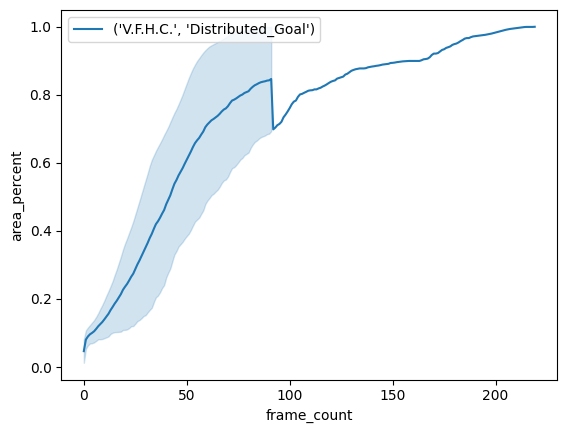

In [13]:
for i,[method, group] in enumerate(vfhc_data.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=group, label=method)

In [14]:
pd.options.display.max_rows = 4000

In [15]:
vfhc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 2036 to 2347
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      312 non-null    int64  
 1   area_percent    312 non-null    float64
 2   update_time     312 non-null    float64
 3   delta_time      312 non-null    float64
 4   plan_length     312 non-null    int64  
 5   replan_count    312 non-null    int64  
 6   logging_time    312 non-null    float64
 7   frame_count     312 non-null    int64  
 8   known_area      312 non-null    int64  
 9   success         312 non-null    bool   
 10  seed            312 non-null    int64  
 11  draw_sim        312 non-null    bool   
 12  log_plots       312 non-null    bool   
 13  use_threads     312 non-null    bool   
 14  n_bots          312 non-null    int64  
 15  grid_thickness  312 non-null    int64  
 16  screen_width    312 non-null    int64  
 17  screen_height   312 non-null   

In [16]:
unique =  set(vfhc_data.frame_count.unique())
# SHOW UNIQUE VALUES OF THE frame_count COLUMN
# unique

In [17]:
for i,[method, group] in enumerate(vfhc_data.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    data = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data["area_percent"] = 1
    new_data = pd.concat([group, data]).sort_values(["experiment_ID", "frame_count"])

In [18]:
unique =  set(vfhc_data.frame_count.unique())
data = vfhc_data.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
data["area_percent"] = 1
new_data = pd.concat([vfhc_data, data]).sort_values(["experiment_ID", "frame_count"])
# new_data


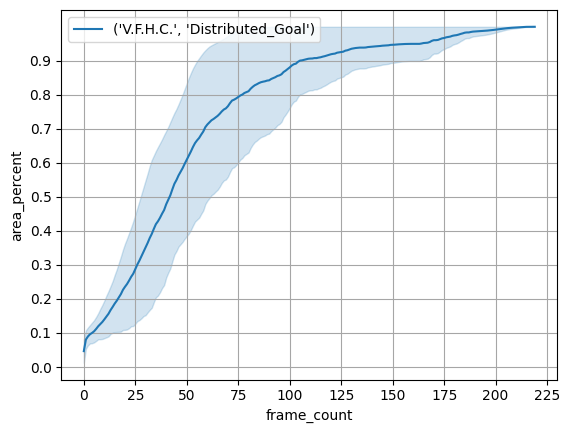

In [19]:
count_group = new_data.groupby(['frame_count'])
sns.lineplot(x="frame_count", y="area_percent", data=new_data, label=method)
plt.xticks(np.arange(0, 250, step=25))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(True, which="both", ls="-", color='0.65')

## Average line plotting for all 4 different methods

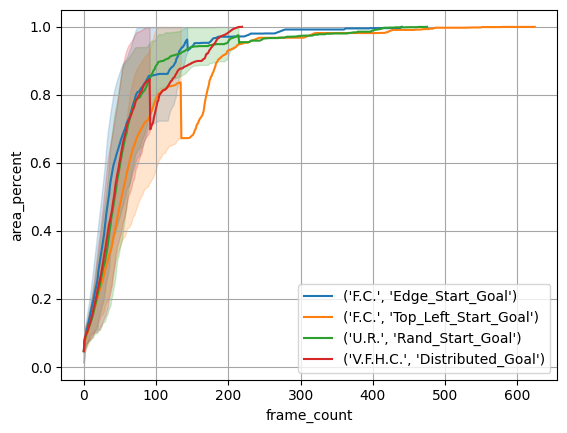

In [20]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    # print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=group, label=method)


# plt.ylim(0.6, 1)
# plt.xlim(80,150)
plt.xlabel('frame_count')
plt.ylabel('area_percent')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.tight_layout()
plt.grid(True, which="both", ls="-", color='0.65')
os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f'{root_dir}/plots/1_frame_count_vs_area_percent_without_fix.png', dpi=300)

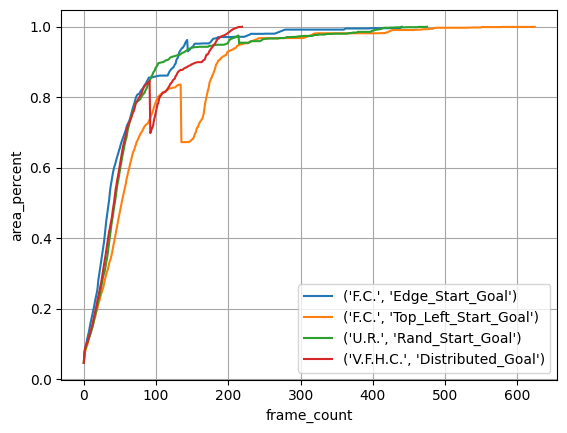

In [21]:
# SHOW ONLY THE MEAN LINES
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    x_data = count_group['area_percent'].mean()
    sns.lineplot(x_data, label=method)

plt.xlabel('frame_count')
plt.ylabel('area_percent')
plt.grid(True, which="both", ls="-", color='0.65')
os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f'{root_dir}/plots/1_frame_count_vs_area_percent_mean_without_fix.png', dpi=300)

i:  0 Method:  ('F.C.', 'Edge_Start_Goal') Group:  (585, 28)
i:  1 Method:  ('F.C.', 'Top_Left_Start_Goal') Group:  (760, 28)
i:  2 Method:  ('U.R.', 'Rand_Start_Goal') Group:  (691, 28)
i:  3 Method:  ('V.F.H.C.', 'Distributed_Goal') Group:  (312, 28)


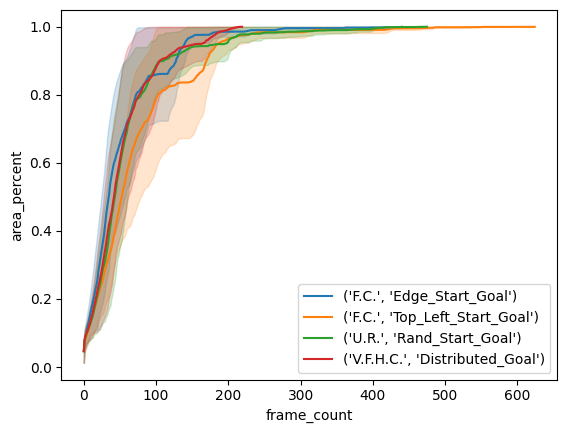

In [22]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    
    data2 = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data2["area_percent"] = 1
    new_data = pd.concat([group, data2]).sort_values(["experiment_ID", "frame_count"])
    
    count_group = new_data.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=new_data, label=method)

os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f'{root_dir}/plots/2_frame_count_vs_area_percent_after_fix.png', dpi=300)
    

i:  0 Method:  ('F.C.', 'Edge_Start_Goal') Group:  (585, 28)
i:  1 Method:  ('F.C.', 'Top_Left_Start_Goal') Group:  (760, 28)
i:  2 Method:  ('U.R.', 'Rand_Start_Goal') Group:  (691, 28)
i:  3 Method:  ('V.F.H.C.', 'Distributed_Goal') Group:  (312, 28)


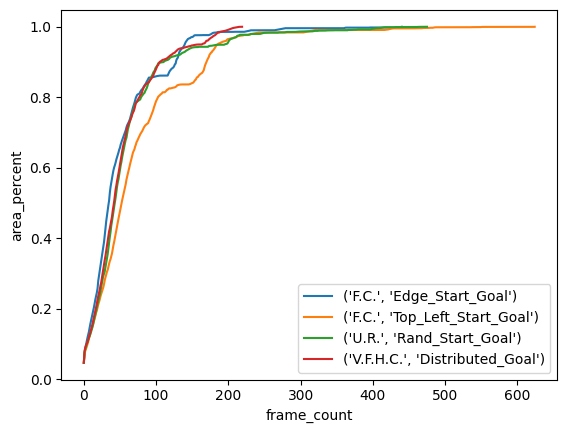

In [23]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    
    data2 = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data2["area_percent"] = 1
    new_data = pd.concat([group, data2]).sort_values(["experiment_ID", "frame_count"])

    count_group = new_data.groupby(['frame_count'])
    x_data = count_group['area_percent'].mean()
    sns.lineplot(x_data, label=method)

os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f'{root_dir}/plots/2_frame_count_vs_area_percent_mean_after_fix.png', dpi=300)
    

## Dense vs sparse data differences

In [24]:
df_all.columns

Index(['Unnamed: 0', 'area_percent', 'update_time', 'delta_time',
       'plan_length', 'replan_count', 'logging_time', 'frame_count',
       'known_area', 'success', 'seed', 'draw_sim', 'log_plots', 'use_threads',
       'n_bots', 'grid_thickness', 'screen_width', 'screen_height',
       'min_room_size', 'max_room_size', 'wall_ratio', 'method',
       'start_scenario', 'goal_scenario', 'experiment_ID', 'loss_type',
       'execution_date', 'method_abbr'],
      dtype='object')

In [25]:
vfhc_data_dense = df_all[(df_all['method_abbr']=='V.F.H.C.') & (df_all['min_room_size']==30)]
vfhc_data_dense.shape

(220, 28)

In [26]:
vfhc_data_sparse = df_all[(df_all['method_abbr']=='V.F.H.C.') & (df_all['min_room_size']==300)]
vfhc_data_sparse.shape

(92, 28)

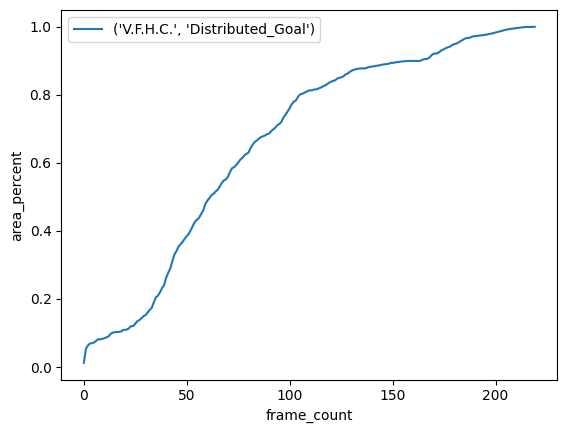

In [27]:
for i,[method, group] in enumerate(vfhc_data_dense.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=group, label=method)

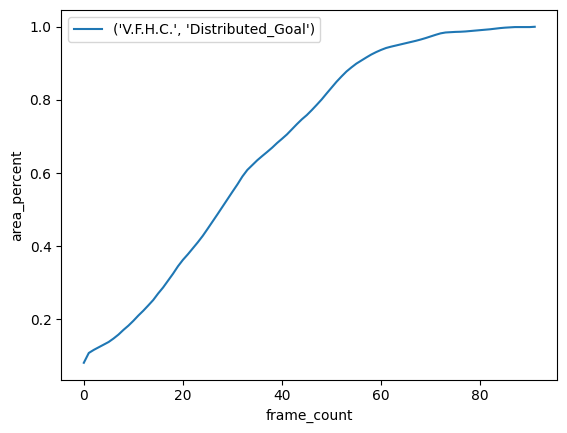

In [28]:
for i,[method, group] in enumerate(vfhc_data_sparse.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=group, label=method)

In [29]:
df_all_dense = df_all[(df_all['min_room_size']==30)]
df_all_dense.shape

(1762, 28)

In [30]:
df_all_sparse = df_all[(df_all['min_room_size']==300)]
df_all_sparse.shape

(586, 28)

i:  0 Method:  ('F.C.', 'Edge_Start_Goal') Group:  (441, 28)
i:  1 Method:  ('F.C.', 'Top_Left_Start_Goal') Group:  (625, 28)
i:  2 Method:  ('U.R.', 'Rand_Start_Goal') Group:  (476, 28)
i:  3 Method:  ('V.F.H.C.', 'Distributed_Goal') Group:  (220, 28)


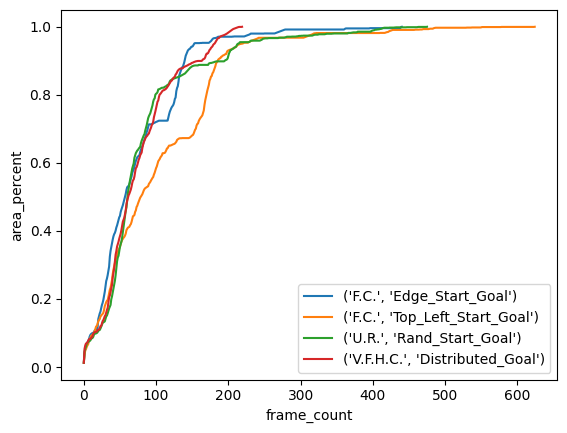

In [31]:
for i,[method, group] in enumerate(df_all_dense.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    
    data2 = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data2["area_percent"] = 1
    new_data = pd.concat([group, data2]).sort_values(["experiment_ID", "frame_count"])

    count_group = new_data.groupby(['frame_count'])
    x_data = count_group['area_percent'].mean()
    sns.lineplot(x_data, label=method)

os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f'{root_dir}/plots/3_frame_count_vs_area_percent_mean_after_fix_dense.png', dpi=300)

i:  0 Method:  ('F.C.', 'Edge_Start_Goal') Group:  (144, 28)
i:  1 Method:  ('F.C.', 'Top_Left_Start_Goal') Group:  (135, 28)
i:  2 Method:  ('U.R.', 'Rand_Start_Goal') Group:  (215, 28)
i:  3 Method:  ('V.F.H.C.', 'Distributed_Goal') Group:  (92, 28)


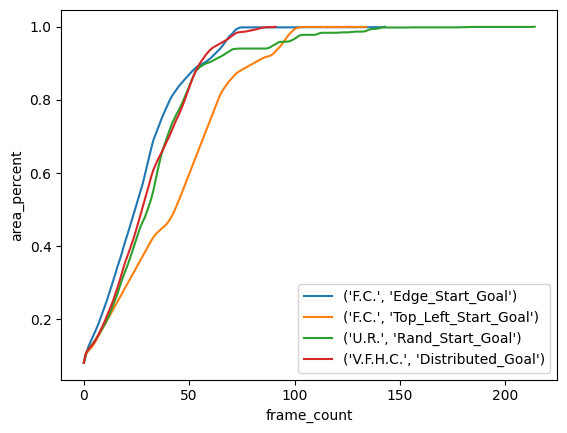

In [32]:
for i,[method, group] in enumerate(df_all_sparse.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    
    data2 = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data2["area_percent"] = 1
    new_data = pd.concat([group, data2]).sort_values(["experiment_ID", "frame_count"])

    count_group = new_data.groupby(['frame_count'])
    x_data = count_group['area_percent'].mean()
    sns.lineplot(x_data, label=method)

os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f'{root_dir}/plots/3_frame_count_vs_area_percent_mean_after_fix_sparse.png', dpi=300)

## KDE Plots

/tmp/ipykernel_59386/2932803920.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  res1 = sns.kdeplot(df_all_dense, x="frame_count", color='green', shade=True)
/tmp/ipykernel_59386/2932803920.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  res2 = sns.kdeplot(df_all_sparse, x="frame_count", color='blue', shade=True)


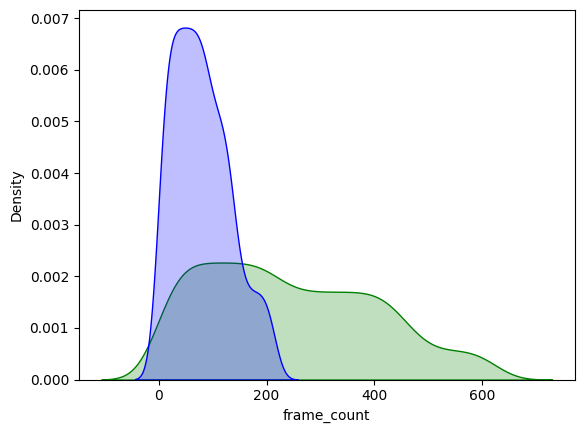

In [33]:
res1 = sns.kdeplot(df_all_dense, x="frame_count", color='green', shade=True)
res2 = sns.kdeplot(df_all_sparse, x="frame_count", color='blue', shade=True)
plt.show()

## Worst scenarios: frame_count & delta_time

In [34]:
# the worst frame count for each method&goal_scenario
df_all.groupby(['method_abbr', 'goal_scenario'])['frame_count'].max().sort_values()

method_abbr  goal_scenario      
V.F.H.C.     Distributed_Goal       219
F.C.         Edge_Start_Goal        440
U.R.         Rand_Start_Goal        475
F.C.         Top_Left_Start_Goal    624
Name: frame_count, dtype: int64

In [35]:
# the worst condition of delta time
df_all.groupby(['method_abbr', 'goal_scenario'])['delta_time'].max().sort_values()

method_abbr  goal_scenario      
V.F.H.C.     Distributed_Goal       4.52
F.C.         Edge_Start_Goal        5.41
U.R.         Rand_Start_Goal        6.19
F.C.         Top_Left_Start_Goal    8.61
Name: delta_time, dtype: float64

## Frame count vs Delta time

In [ ]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    # print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    plt.grid(True, which="both", ls="-", color='0.65')
    sns.lineplot(x="frame_count", y="delta_time", data=group, label=method)
os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f"{root_dir}/plots/frame_count_vs_delta_time.png", dpi=300)

## Pandas drop unnecessary columns

In [ ]:
# DROP CERTAIN COLUMNS FROM THE DATAFRAME
# to_drop = ['update_time', 'delta_time',
#        'plan_length', 'replan_count', 'logging_time',
#        'known_area', 'success', 'seed', 'draw_sim', 'log_plots', 'use_threads',
#        'n_bots', 'grid_thickness', 'screen_width', 'screen_height',
#        'min_room_size', 'max_room_size', 'wall_ratio', 'method',
#        'start_scenario', 'experiment_ID', 'loss_type',
#        'execution_date']
# vfhc_data.drop(to_drop, inplace=True, axis=1)

## Pandas data separation

In [ ]:
# dense_room = df_all[(df_all['n_bots']==4) & (df_all['min_room_size']==30)]
# dense_room.head()

In [ ]:
# empty_room = df_all[(df_all['n_bots']==4) & (df_all['min_room_size']==300)]
# empty_room.head()

In [ ]:
# dense_room.shape

In [ ]:
# empty_room.shape

In [ ]:
# sns.lineplot(x="Frame Count", y='Area Percent', hue="Method", data=dense_room)
# # plt.ylim(0.6, 1)
# # plt.xlim(0,200)
# os.makedirs(f"{root_dir}/data_analysis/plotting", exist_ok=True)
# plt.savefig(f"{root_dir}/data_analysis/plotting/area_percent_vs_frame_count_hue_method.png", dpi=300)


In [ ]:
# sns.lineplot(x="Frame Count", y='Area Percent', hue="Method", data=empty_room)
# # plt.ylim(0.6, 1)
# # plt.xlim(0,200)
# os.makedirs(f"{root_dir}/data_analysis/plotting", exist_ok=True)
# plt.savefig(f"{root_dir}/data_analysis/plotting/area_percent_vs_frame_count_hue_method.png", dpi=300)
